## Chapter 1 - The Machine Learning Landscape

In this example, you want to find out if a higher GDP indeed equates to a better life satisfaction. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Ingestion
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    # Added 1 line to convert string values to float values
    full_country_stats['GDP per capita'] = full_country_stats['GDP per capita'].apply(lambda x : float(x.replace(',','')))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

df1 = pd.read_csv('oecd_bli_2015.csv')
df2 = pd.read_csv('gdp_per_capita.csv', sep='\t')
df = prepare_country_stats(df1.copy(), df2.copy())
display(df.head())

,GDP per capita,Life satisfaction
Country,,
Poland,12495.334,5.8
Chile,13340.905,6.7
Slovak Republic,15991.736,6.1
Czech Republic,17256.918,6.5
Greece,18064.288,4.8


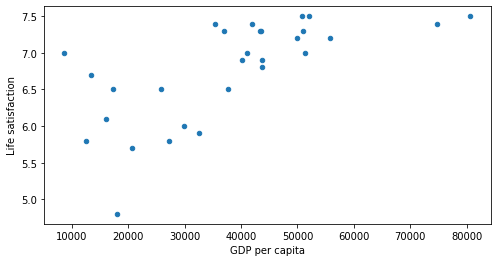

In [15]:
# Plot scatterplot for GDP per capita & Life satisfaction
fig, ax = plt.subplots(figsize=(8,4))
df.plot(kind='scatter', x='GDP per capita', 
        y='Life satisfaction', ax=ax)
plt.show()

In [4]:
# Define input variable & target variable
X = df[['GDP per capita']]
y = df['Life satisfaction']

The proposed model is:

$$\text{life satisfaction} = \beta_0 + \beta_1\text{GDP_per_capita}$$

In [17]:
# Initialise model
reg = LinearRegression()

# Train
reg.fit(X, y)

print(reg.intercept_)
print(reg.coef_)

5.765743289901007
[2.64542565e-05]


As you can see, the fitted model has $\hat{\beta_0} = 5.766$ and $\hat{\beta_1} = 2.64 \times 10^{-5}$

In [18]:
# Predict
print(reg.predict([[22587]]))

[6.36326558]


,X_test,y_test
0,0.000000,5.765743
1,1632.653061,5.808934
2,3265.306122,5.852125
3,4897.959184,5.895315
4,6530.612245,5.938506


,c,t
0,22587,6.363266


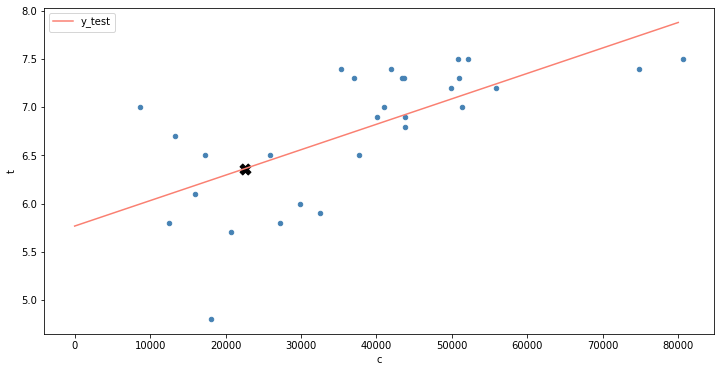

In [19]:
# Get the predicted line
test_df = pd.DataFrame({'X_test' : np.linspace(0, 80000)})
y_test = reg.predict(test_df[['X_test']])
test_df['y_test'] = y_test
display(test_df.head())

# Predict for Cyprus
cyprus_df = pd.DataFrame({'c' : [22587]})
cyprus_df['t'] = reg.predict(cyprus_df)
display(cyprus_df)

# Plot scatterplot for predicted model
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', ax=ax, color='steelblue')
test_df.plot(kind='line', x='X_test', y='y_test', ax=ax, color='salmon')
cyprus_df.plot(kind='scatter', x='c', y='t', ax=ax, color='black',s=120, marker='X')

Other ways to predict include using other models, in this case the k-nearest neighbours model or kNN model.

In [9]:
# Initialise model
reg2 = KNeighborsRegressor(n_neighbors=3)

# Train
reg2.fit(X, y)

# Predict
cyprus_df['k'] = reg2.predict(cyprus_df[['c']])
display(cyprus_df)

,c,t,k
0,22587,6.363266,5.666667


Text(24087, 5.636666666666667, 'KNN Regression')

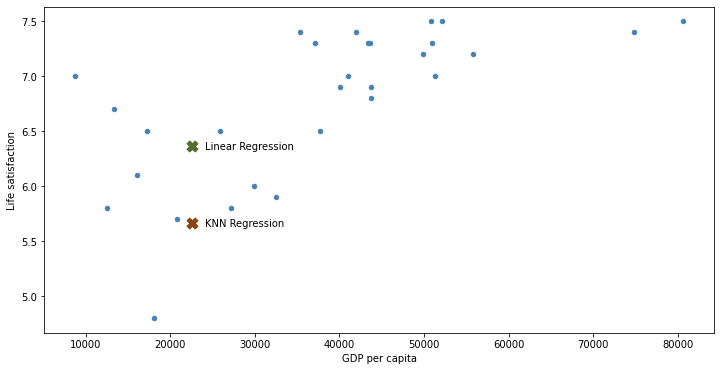

In [10]:
# Contrast LinearRegression vs. KNNRegression
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', ax=ax, color='steelblue')
cyprus_df.plot(kind='scatter', x='c', y='t', ax=ax, color='darkolivegreen',s=120, marker='X')
cyprus_df.plot(kind='scatter', x='c', y='k', ax=ax, color='saddlebrown',s=120, marker='X')
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Life satisfaction')
ax.annotate('Linear Regression', xy=(cyprus_df.loc[0,'c']+1500,cyprus_df.loc[0,'t']-0.03))
ax.annotate('KNN Regression', xy=(cyprus_df.loc[0,'c']+1500,cyprus_df.loc[0,'k']-0.03))